In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

In [2]:
data = dict()

In [3]:
data["sentiment"]=[]
data["content"]=[]

In [4]:
data

{'sentiment': [], 'content': []}

In [5]:
file = open("./data/train.txt","r")

In [6]:
lines = file.readlines()

In [7]:
for line in lines:
    col = line.split(";")
    data["content"].append(col[0])
    data["sentiment"].append(col[1].strip())


In [8]:
df = pd.DataFrame(data)

In [9]:
df

,sentiment,content
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned...
2,anger,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplac...
4,anger,i am feeling grouchy
...,...,...
15995,sadness,i just had a very brief time in the beanbag an...
15996,sadness,i am now turning and i feel pathetic that i am...
15997,joy,i feel strong and good overall
15998,anger,i feel like this was such a rude comment and i...


In [10]:
import neattext.functions as nfx

In [11]:
df['Clean_Text'] = df['content'].apply(nfx.remove_stopwords)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_shortwords)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [12]:
df[df["Clean_Text"]==""]

,sentiment,content,Clean_Text
12801,sadness,one day,


In [13]:
df = df.loc[df["Clean_Text"]!=""]
df[df["Clean_Text"]==""]

,sentiment,content,Clean_Text


In [14]:
df.drop("content",inplace=True,axis=1)

C:\Users\USER\AppData\Local\Temp\ipykernel_11312\2876920619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("content",inplace=True,axis=1)


In [15]:
df

,sentiment,Clean_Text
0,sadness,didnt feel humiliated
1,sadness,feeling hopeless damned hopeful cares awake
2,anger,grabbing minute post feel greedy wrong
3,love,feeling nostalgic fireplace know property
4,anger,feeling grouchy
...,...,...
15995,sadness,brief time beanbag said anna feel like beaten
15996,sadness,turning feel pathetic waiting tables subbing t...
15997,joy,feel strong good overall
15998,anger,feel like rude comment glad


In [16]:
df['sentiment'].value_counts()

joy         5362
sadness     4665
anger       2159
fear        1937
love        1304
surprise     572
Name: sentiment, dtype: int64

<AxesSubplot: >

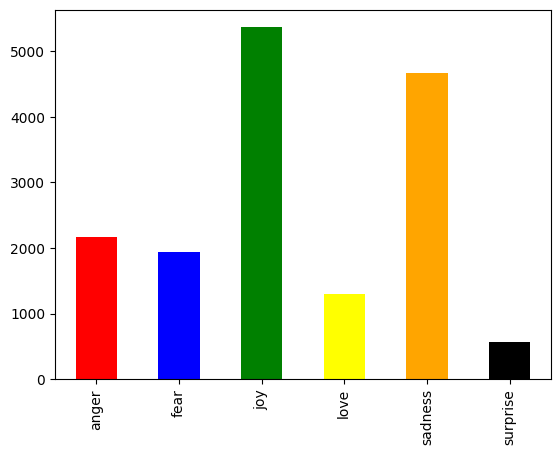

In [17]:
import matplotlib.pyplot as plt
df['sentiment'].value_counts().sort_index().plot.bar(color=['red', 'blue', 'green','yellow','orange','black'])

# Splitting Datasets

In [18]:
x = df['Clean_Text'].values
y = df['sentiment'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0,stratify = y)

In [19]:
np.unique(y_train,return_counts=True)

(array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
       dtype=object),
 array([1727, 1550, 4289, 1043, 3732,  458], dtype=int64))

In [20]:
np.unique(y_test,return_counts=True)

(array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
       dtype=object),
 array([ 432,  387, 1073,  261,  933,  114], dtype=int64))

In [21]:
import nltk
nltk.download('omw-1.4')
from nltk.corpus import wordnet

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [22]:
max_ele = np.unique(y_train,return_counts=True)[1].max()
total_ele = np.unique(y_train,return_counts=True)[1].sum()
#y_train = np.insert(y_train,total_ele,"happy")
y_emotions_count = np.unique(y_train,return_counts=True)[1]
y_emotions = np.unique(y_train,return_counts=True)[0]
import random
i=0
for e in y_emotions_count:
    if e != max_ele:
        synonyms = []
        for syn in wordnet.synsets(y_emotions[i]):
            for l in syn.lemmas():
                if l.name() not in synonyms:
                    synonyms.append(l.name())
        new_words = random.sample(synonyms,2)
        line_entered = ""
        for w in new_words:
            line_entered = line_entered + w + " "
        #print(line_entered+" "+y_emotions[i])
        for num in range(0,max_ele-e):
            x_train = np.insert(x_train,total_ele,line_entered)
            y_train = np.insert(y_train,total_ele,y_emotions[i])
        i=i+1
    else:
        i=i+1

In [23]:
#np.unique(x_train,return_counts=True)

In [24]:
df.shape

(15999, 2)

# Pipeline

Vectorization using TFIDF Vectorizer and 
Calling SVM Algorithm

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
text_model = Pipeline([('tfidf',TfidfVectorizer()),('model',SVC(probability=True))])

In [83]:
text_model.fit(x_train,y_train)
y_pred = text_model.predict(x_test)
np.unique(y_pred,return_counts=True)

# Model Evaluation

In [28]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_pred,y_test)*100

84.71875

In [29]:
confusion_matrix(y_pred,y_test)

array([[ 340,   18,    9,    2,   18,    1],
       [   7,  301,   12,    2,   14,   17],
       [  39,   32, 1016,  101,   55,   28],
       [   1,    0,   17,  148,    4,    0],
       [  44,   30,   19,    8,  841,    3],
       [   1,    6,    0,    0,    1,   65]], dtype=int64)

In [30]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       anger       0.79      0.88      0.83       388
        fear       0.78      0.85      0.81       353
         joy       0.95      0.80      0.87      1271
        love       0.57      0.87      0.69       170
     sadness       0.90      0.89      0.90       945
    surprise       0.57      0.89      0.70        73

    accuracy                           0.85      3200
   macro avg       0.76      0.86      0.80      3200
weighted avg       0.87      0.85      0.85      3200



In [31]:
text_model.predict(['Feel very broken today'])

array(['sadness'], dtype=object)

In [32]:
text_model.predict(['This is the best day I had!'])

array(['joy'], dtype=object)

In [79]:
text_model.predict_proba(['This is the best day I had!'])

AttributeError: predict_proba is not available when  probability=False

In [34]:
import pickle
with open('Sentiment_Analyser_SVM.pickle','wb') as f:
    pickle.dump(text_model,f)

# Logistic Regression

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
pipe_lr = Pipeline([('tfidf',TfidfVectorizer()),('lr',LogisticRegression(multi_class='multinomial',solver = 'lbfgs'))])

In [26]:
pipe_lr.fit(x_train,y_train)
y_pred2 = pipe_lr.predict(x_test)
np.unique(y_pred2,return_counts=True)

c:\Users\USER\Desktop\Emotion_Detection_using_Text\protim\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
       dtype=object),
 array([ 389,  329, 1254,  182,  973,   73], dtype=int64))

# Evaluation

In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_pred2,y_test)*100

85.59375

In [28]:
confusion_matrix(y_pred2,y_test)

array([[ 345,   16,    7,    2,   18,    1],
       [   8,  293,    6,    2,    9,   11],
       [  31,   29, 1026,   87,   48,   33],
       [   1,    2,   15,  161,    3,    0],
       [  46,   36,   19,    9,  854,    9],
       [   1,   11,    0,    0,    1,   60]], dtype=int64)

In [29]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

       anger       0.80      0.89      0.84       389
        fear       0.76      0.89      0.82       329
         joy       0.96      0.82      0.88      1254
        love       0.62      0.88      0.73       182
     sadness       0.92      0.88      0.90       973
    surprise       0.53      0.82      0.64        73

    accuracy                           0.86      3200
   macro avg       0.76      0.86      0.80      3200
weighted avg       0.88      0.86      0.86      3200



In [30]:
pipe_lr.predict(['Feel very broken today'])

array(['sadness'], dtype=object)

In [31]:
pipe_lr.predict(['This is the best day I had!'])

array(['joy'], dtype=object)

In [32]:
pipe_lr.predict_proba(['This is the best day I had!'])

array([[0.12295559, 0.11151732, 0.38201259, 0.10361853, 0.24904577,
        0.0308502 ]])

In [42]:
import pickle
with open('Sentiment_Analyser_LR.pickle','wb') as f:
    pickle.dump(pipe_lr,f)

# Naive Bayes

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
pipe_nb = Pipeline([('tfidf',TfidfVectorizer()),('nb',MultinomialNB())])
#pipe_nb = MultinomialNB()

In [44]:
#pipe_nb.fit(x_trains,y_trains)
pipe_nb.fit(x_train,y_train)
y_pred2 = pipe_nb.predict(x_test)
np.unique(y_pred2,return_counts=True)

(array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'], dtype='<U8'),
 array([ 246,  207, 1494,   73, 1158,   22], dtype=int64))

# Evaluation

In [45]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_pred2,y_test)*100

74.6875

In [46]:
confusion_matrix(y_pred2,y_test)

array([[ 227,   12,    2,    1,    4,    0],
       [   5,  191,    3,    0,    4,    4],
       [  78,   87, 1037,  151,   78,   63],
       [   0,    0,    2,   70,    1,    0],
       [ 122,   94,   29,   39,  846,   28],
       [   0,    3,    0,    0,    0,   19]], dtype=int64)

In [47]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

       anger       0.53      0.92      0.67       246
        fear       0.49      0.92      0.64       207
         joy       0.97      0.69      0.81      1494
        love       0.27      0.96      0.42        73
     sadness       0.91      0.73      0.81      1158
    surprise       0.17      0.86      0.28        22

    accuracy                           0.75      3200
   macro avg       0.55      0.85      0.60      3200
weighted avg       0.86      0.75      0.77      3200



In [48]:
pipe_nb.predict(['Feel very broken today'])

array(['sadness'], dtype='<U8')

In [49]:
pipe_nb.predict(['Not bad'])

array(['anger'], dtype='<U8')

In [50]:
import pickle
with open('Sentiment_Analyser_NB.pickle','wb') as f:
    pickle.dump(pipe_nb,f)

# Decision tree

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier  
pipe_dct =  Pipeline([('tfidf',TfidfVectorizer()),('dct',DecisionTreeClassifier(criterion='log_loss'))])

In [52]:
pipe_dct.fit(x_train,y_train)
y_pred2 = pipe_dct.predict(x_test)
np.unique(y_pred2,return_counts=True)

(array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
       dtype=object),
 array([ 442,  396, 1087,  261,  893,  121], dtype=int64))

# Evaluation

In [53]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_pred2,y_test)*100

83.53125

In [54]:
confusion_matrix(y_pred2,y_test)

array([[364,  17,  18,   6,  37,   0],
       [ 18, 312,  20,   3,  31,  12],
       [ 18,  17, 923,  58,  65,   6],
       [  2,   2,  58, 191,   8,   0],
       [ 26,  25,  47,   2, 790,   3],
       [  4,  14,   7,   1,   2,  93]], dtype=int64)

In [55]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

       anger       0.84      0.82      0.83       442
        fear       0.81      0.79      0.80       396
         joy       0.86      0.85      0.85      1087
        love       0.73      0.73      0.73       261
     sadness       0.85      0.88      0.87       893
    surprise       0.82      0.77      0.79       121

    accuracy                           0.84      3200
   macro avg       0.82      0.81      0.81      3200
weighted avg       0.84      0.84      0.84      3200



In [56]:
pipe_dct.predict(['Feel very broken today'])

array(['joy'], dtype=object)

In [57]:
pipe_dct.predict(['worst'])

array(['fear'], dtype=object)

In [58]:
import pickle
with open('Sentiment_Analyser_DCT.pickle','wb') as f:
    pickle.dump(pipe_dct,f)

# Random Forest Classifier

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier   
from sklearn.neighbors import KNeighborsClassifier  
pipe_rf =  Pipeline([('tfidf',TfidfVectorizer()),('rf',RandomForestClassifier())])

In [60]:
pipe_rf.fit(x_train,y_train)
y_pred2 = pipe_rf.predict(x_test)
np.unique(y_pred2,return_counts=True)

(array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
       dtype=object),
 array([ 386,  364, 1248,  193,  908,  101], dtype=int64))

# Evaluation

In [61]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_pred2,y_test)*100

84.65625

In [62]:
confusion_matrix(y_pred2,y_test)

array([[ 340,   13,    9,    2,   21,    1],
       [  12,  307,   14,    2,   16,   13],
       [  38,   30, 1005,   78,   80,   17],
       [   2,    0,   21,  167,    3,    0],
       [  37,   25,   20,   11,  811,    4],
       [   3,   12,    4,    1,    2,   79]], dtype=int64)

In [63]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

       anger       0.79      0.88      0.83       386
        fear       0.79      0.84      0.82       364
         joy       0.94      0.81      0.87      1248
        love       0.64      0.87      0.74       193
     sadness       0.87      0.89      0.88       908
    surprise       0.69      0.78      0.73       101

    accuracy                           0.85      3200
   macro avg       0.79      0.85      0.81      3200
weighted avg       0.86      0.85      0.85      3200



In [64]:
pipe_rf.predict(['Feel very broken today'])

array(['joy'], dtype=object)

In [65]:
pipe_rf.predict(['This is the best day I had'])

array(['fear'], dtype=object)

In [67]:
import pickle
with open('Sentiment_Analyser_RF.pickle','wb') as f:
    pickle.dump(pipe_rf,f)

#  K-Nearest Neighbours

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier 
pipe_knn =  Pipeline([('tfidf',TfidfVectorizer()),('knn',KNeighborsClassifier(n_neighbors=20))])

In [69]:
pipe_knn.fit(x_train,y_train)
y_pred2 = pipe_knn.predict(x_test)
np.unique(y_pred2,return_counts=True)

(array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
       dtype=object),
 array([ 396,  324, 1228,  143, 1024,   85], dtype=int64))

#  Evaluation

In [70]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_pred2,y_test)*100

81.3125

In [71]:
confusion_matrix(y_pred2,y_test)

array([[339,  20,  10,   3,  22,   2],
       [  6, 281,  12,   3,  11,  11],
       [ 30,  26, 972,  99,  76,  25],
       [  0,   0,  13, 127,   3,   0],
       [ 55,  44,  65,  29, 819,  12],
       [  2,  16,   1,   0,   2,  64]], dtype=int64)

In [72]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

       anger       0.78      0.86      0.82       396
        fear       0.73      0.87      0.79       324
         joy       0.91      0.79      0.84      1228
        love       0.49      0.89      0.63       143
     sadness       0.88      0.80      0.84      1024
    surprise       0.56      0.75      0.64        85

    accuracy                           0.81      3200
   macro avg       0.72      0.83      0.76      3200
weighted avg       0.84      0.81      0.82      3200



In [73]:
pipe_knn.predict(['Feel very broken today'])

array(['sadness'], dtype=object)

In [74]:
pipe_knn.predict(['This is the best day I had'])

array(['joy'], dtype=object)

In [76]:
import pickle
with open('Sentiment_Analyser_KNN.pickle','wb') as f:
    pickle.dump(pipe_knn,f)